In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
df = pd.read_csv('merged_data_v3.csv')
df

,Country,year,GDP,DailyIncome,female_years_schooling,EmploymentRate15,employment_rate_15_24,"Total Population, as of 1 July","Male Population, as of 1 July","Female Population, as of 1 July",...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants,"Net Migration Rate (per 1,000 population)"
0,China,1990,1820,1.90,5.74,NaN,NaN,1.153583e+09,587726093.0,565856632.0,...,245.484,178.465,77.973,93.470,61.318,159.732,190.860,125.386,-11187.0,-0.010
1,Germany,1990,34300,49.00,8.21,NaN,NaN,7.970796e+07,38478255.0,41229704.0,...,168.478,85.782,51.223,68.026,33.264,119.057,158.114,77.142,679702.0,8.527
2,Spain,1990,25800,26.70,6.64,NaN,NaN,3.908498e+07,19174944.0,19910036.0,...,155.951,69.276,50.194,72.173,27.427,102.708,144.792,59.525,-30684.0,-0.785
3,France,1990,33300,41.70,7.36,NaN,NaN,5.699024e+07,27696324.0,29293914.0,...,177.917,77.498,57.053,80.909,32.297,119.193,167.574,68.976,43323.0,0.760
4,Indonesia,1990,4530,2.29,3.55,NaN,NaN,1.835011e+08,91622838.0,91878260.0,...,313.390,257.019,108.951,119.941,98.106,209.919,234.896,185.624,11539.0,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,India,2023,7490,5.49,NaN,NaN,NaN,1.438070e+09,741883264.0,696186332.0,...,203.674,149.759,64.796,79.624,48.621,151.102,177.914,122.021,-979179.0,-0.681
336,Italy,2023,44200,56.30,NaN,NaN,NaN,5.949945e+07,29062453.0,30437000.0,...,61.427,36.316,18.194,23.426,12.775,45.855,58.144,33.494,150189.0,2.524
337,Pakistan,2023,5320,5.18,NaN,NaN,NaN,2.475045e+08,125731250.0,121773246.0,...,258.164,181.272,79.170,96.016,61.346,166.421,201.044,129.882,-1619557.0,-6.544
338,USA,2023,65700,90.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


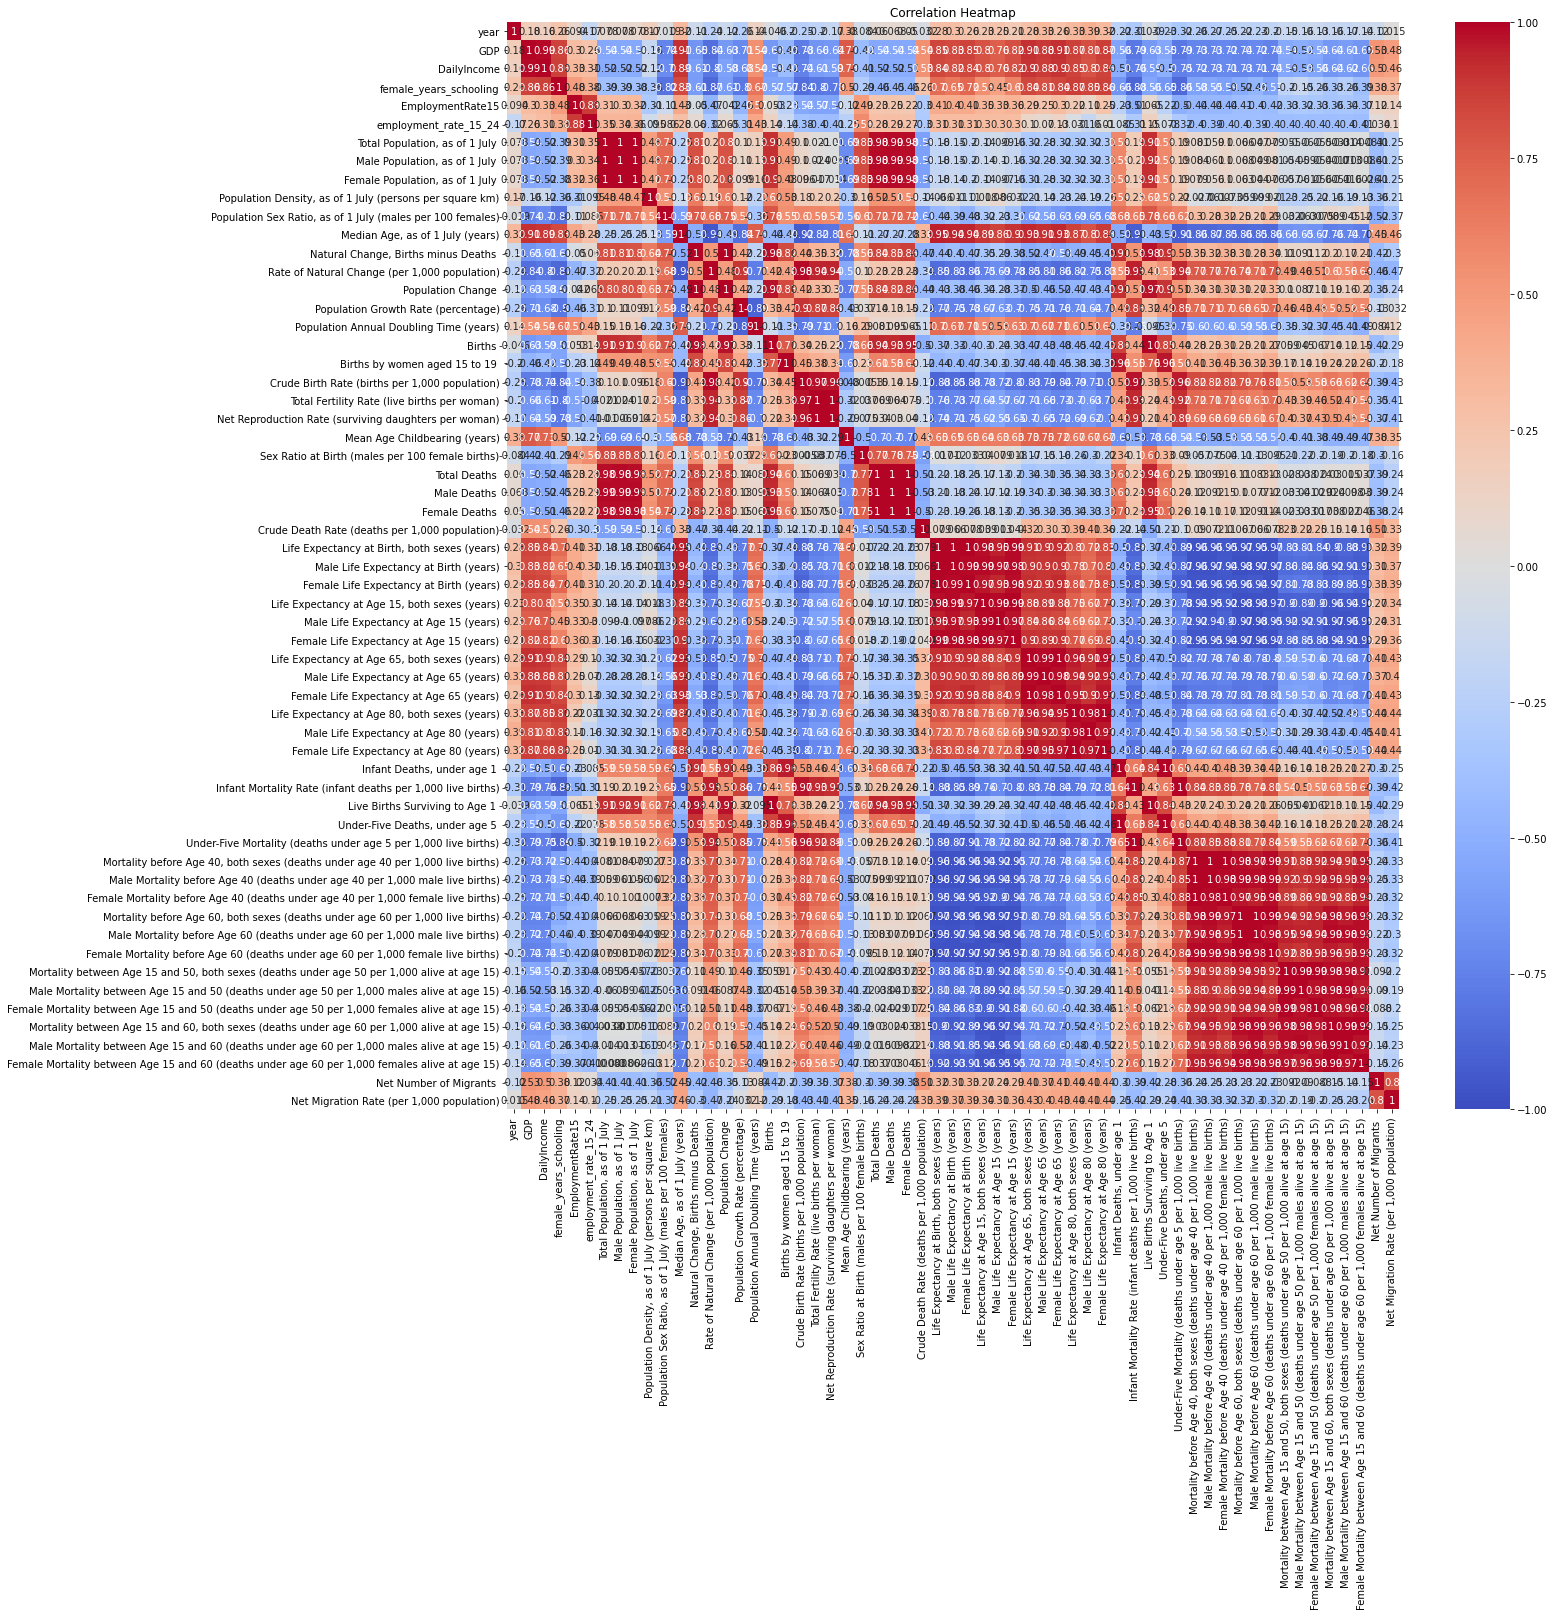

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Set the threshold for high correlation (e.g., 0.8)
threshold = 0.7

# Get the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation above the threshold
high_corr_pairs = [(col1, col2, correlation_matrix.loc[col1, col2]) 
                   for col1 in upper_tri.columns 
                   for col2 in upper_tri.index 
                   if abs(upper_tri.loc[col1, col2]) > threshold]

# Sort pairs by correlation strength (absolute value)
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the highly correlated pairs
print("Highly correlated column pairs:")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")

Highly correlated column pairs:
Total Population, as of 1 July  - Male Population, as of 1 July : 1.00
Total Population, as of 1 July  - Female Population, as of 1 July : 1.00
Male Population, as of 1 July  - Female Population, as of 1 July : 1.00
Births  - Live Births Surviving to Age 1 : 1.00
Infant Deaths, under age 1  - Under-Five Deaths, under age 5 : 1.00
Total Deaths  - Male Deaths : 1.00
Total Deaths  - Female Deaths : 1.00
Life Expectancy at Age 65, both sexes (years) - Female Life Expectancy at Age 65 (years): 1.00
Infant Mortality Rate (infant deaths per 1,000 live births) - Under-Five Mortality (deaths under age 5 per 1,000 live births): 1.00
Natural Change, Births minus Deaths  - Population Change : 1.00
Life Expectancy at Age 80, both sexes (years) - Female Life Expectancy at Age 80 (years): 1.00
Life Expectancy at Birth, both sexes (years) - Female Life Expectancy at Birth (years): 1.00
Male Deaths  - Female Deaths : 1.00
Mortality before Age 40, both sexes (deaths under

In [19]:
df2 = pd.read_csv('merged_data_v2.csv')

In [16]:
unique_countries = sorted(df['Country'].unique())

In [17]:
unique_countries

['China',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Pakistan',
 'South Africa',
 'Spain',
 'USA']

In [20]:
filtered_df = df2[df2['Country'].isin(unique_countries)]
filtered_df

,Country,year,DailyIncome,female_years_schooling,EmploymentRate15,employment_rate_15_24,"Total Population, as of 1 July","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,Female Deaths,"Crude Death Rate (deaths per 1,000 population)",Male Life Expectancy at Age 15 (years),Female Life Expectancy at Age 15 (years),"Infant Deaths, under age 1","Infant Mortality Rate (infant deaths per 1,000 live births)",Live Births Surviving to Age 1,"Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",Net Number of Migrants,"Net Migration Rate (per 1,000 population)"
32,China,1990,1.90,5.74,NaN,NaN,1.153583e+09,120.165,103.865,23.730,...,3639899.0,6.913,55.453,59.976,1121063.0,40.118,27136992.0,101.792,-11187.0,-0.010
44,Germany,1990,49.00,8.21,NaN,NaN,7.970796e+07,228.678,93.327,36.600,...,496569.0,11.584,57.776,64.138,6403.0,7.072,901951.0,33.941,679702.0,8.527
53,Spain,1990,26.70,6.64,NaN,NaN,3.908498e+07,77.804,96.308,32.507,...,154699.0,8.454,59.365,66.377,3097.0,7.608,403714.0,38.684,-30684.0,-0.785
58,France,1990,41.70,7.36,NaN,NaN,5.699024e+07,103.359,94.546,33.731,...,253973.0,9.268,58.609,66.690,5703.0,7.409,765935.0,38.611,43323.0,0.760
77,Indonesia,1990,2.29,3.55,NaN,NaN,1.835011e+08,96.027,99.722,20.645,...,692066.0,8.092,53.258,56.161,300976.0,63.232,4509597.0,148.289,11539.0,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,India,2023,5.49,NaN,NaN,NaN,1.438070e+09,483.679,106.564,28.060,...,4361727.0,6.611,57.751,60.945,525425.0,22.619,22748701.0,60.045,-979179.0,-0.681
6519,Italy,2023,56.30,NaN,NaN,NaN,5.949945e+07,201.029,95.484,47.461,...,343022.0,11.150,66.845,70.991,869.0,2.244,383889.0,10.784,150189.0,2.524
6569,Pakistan,2023,5.18,NaN,NaN,NaN,2.475045e+08,321.067,103.250,20.287,...,697501.0,6.466,55.241,59.489,339374.0,49.363,6604988.0,102.684,-1619557.0,-6.544
6619,USA,2023,90.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


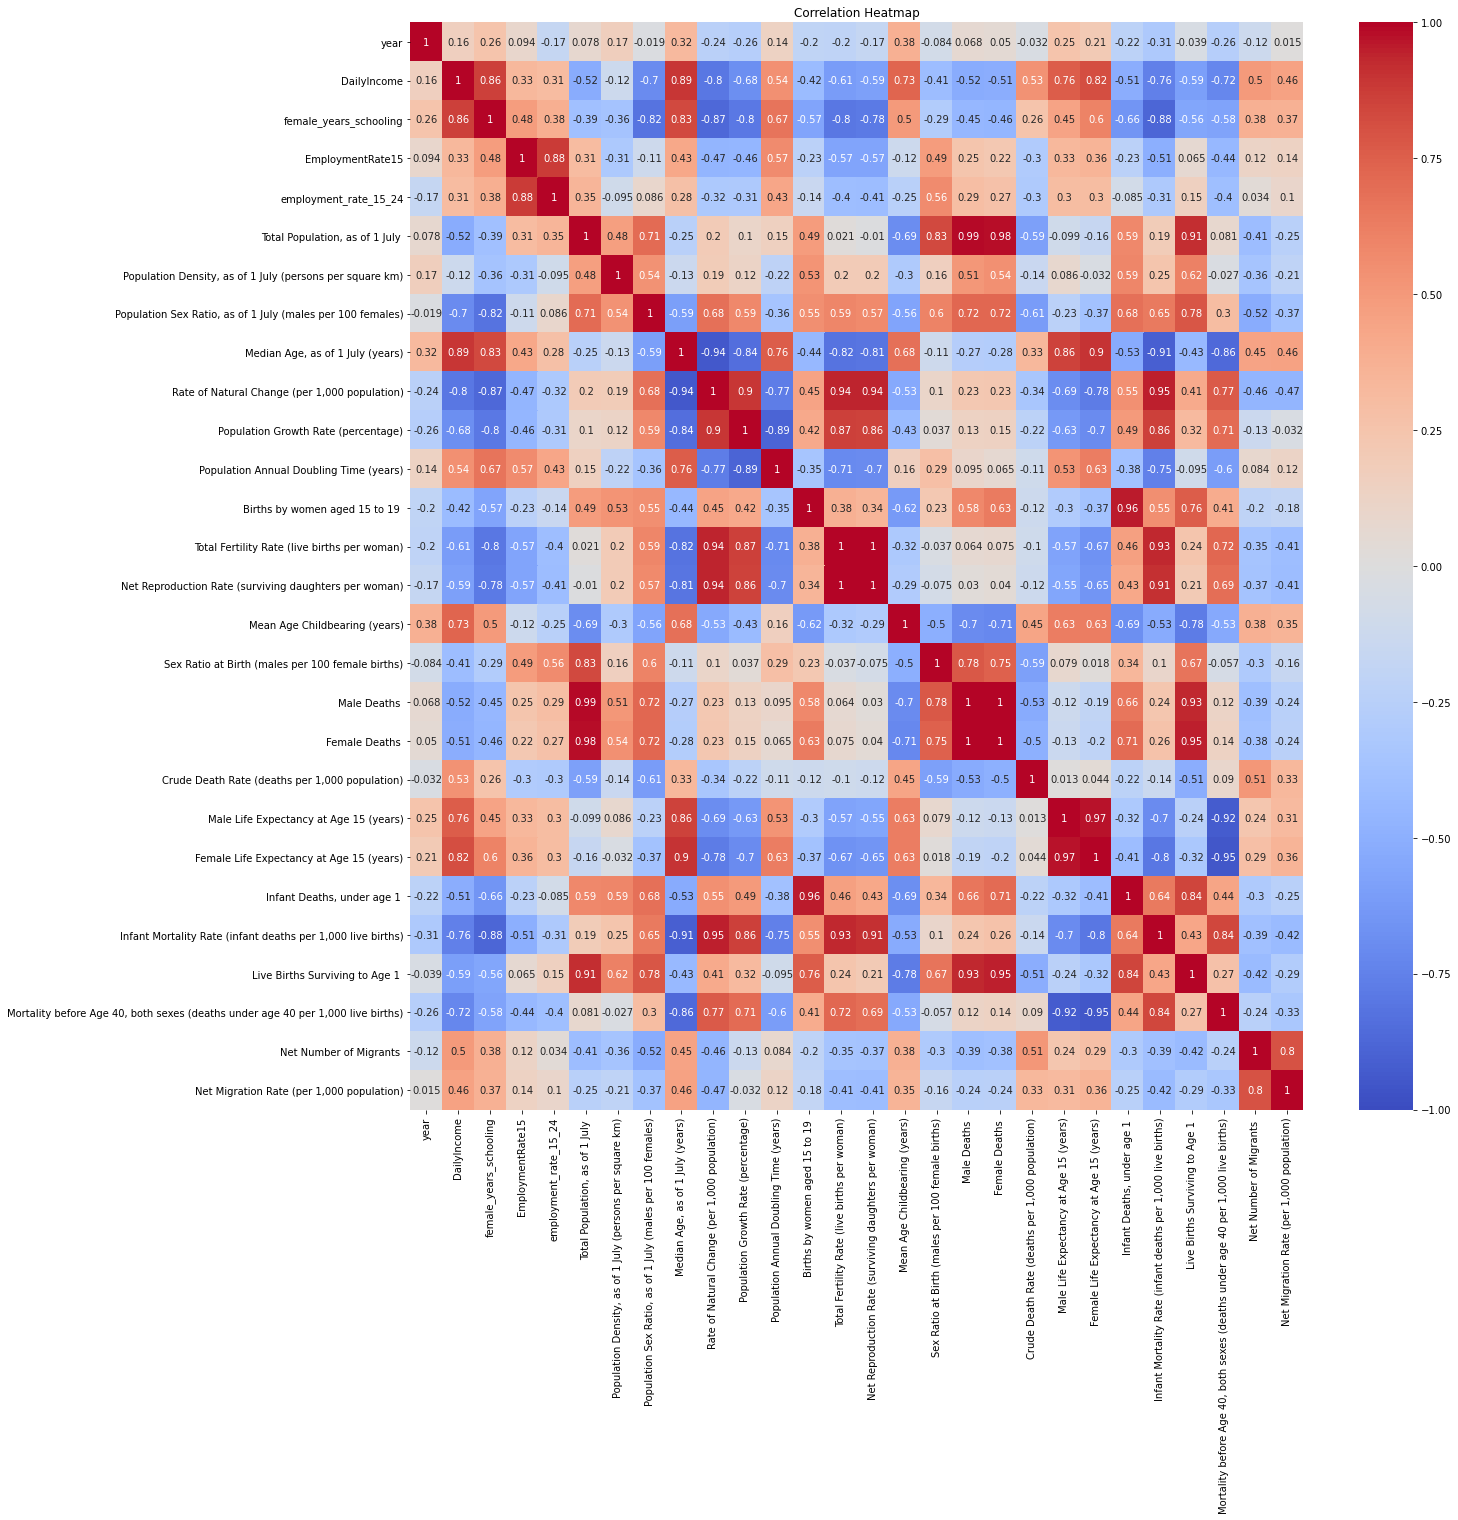

In [21]:
correlation_matrix1 = filtered_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Set the threshold for high correlation (e.g., 0.8)
threshold = 0.7

# Get the upper triangle of the correlation matrix
upper_tri = correlation_matrix1.where(np.triu(np.ones(correlation_matrix1.shape), k=1).astype(bool))

# Find pairs of columns with correlation above the threshold
high_corr_pairs = [(col1, col2, correlation_matrix1.loc[col1, col2]) 
                   for col1 in upper_tri.columns 
                   for col2 in upper_tri.index 
                   if abs(upper_tri.loc[col1, col2]) > threshold]

# Sort pairs by correlation strength (absolute value)
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the highly correlated pairs
print("Highly correlated column pairs:")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")

Highly correlated column pairs:
Male Deaths  - Female Deaths : 1.00
Total Fertility Rate (live births per woman) - Net Reproduction Rate (surviving daughters per woman): 1.00
Total Population, as of 1 July  - Male Deaths : 0.99
Total Population, as of 1 July  - Female Deaths : 0.98
Male Life Expectancy at Age 15 (years) - Female Life Expectancy at Age 15 (years): 0.97
Births by women aged 15 to 19  - Infant Deaths, under age 1 : 0.96
Female Deaths  - Live Births Surviving to Age 1 : 0.95
Rate of Natural Change (per 1,000 population) - Infant Mortality Rate (infant deaths per 1,000 live births): 0.95
Female Life Expectancy at Age 15 (years) - Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births): -0.95
Rate of Natural Change (per 1,000 population) - Total Fertility Rate (live births per woman): 0.94
Median Age, as of 1 July (years) - Rate of Natural Change (per 1,000 population): -0.94
Rate of Natural Change (per 1,000 population) - Net Reproduction Rate (survi

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


unique_countries = filtered_df['Country'].unique()

# Function to run Lasso regression for a single country
def run_lasso_for_country(country_data):
    X = country_data.drop(['Country', 'year', 'Total Fertility Rate (live births per woman)'], axis=1)
    y = country_data['Total Fertility Rate (live births per woman)']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Lasso Regression Model
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train_scaled, y_train)
    
    # Make predictions and evaluate
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Analyze feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
    feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
    
    return mse, r2, feature_importance

# Run Lasso regression for each country
for country in unique_countries:
    country_data = filtered_df[filtered_df['Country'] == country]
    
    # Check if there's enough data for this country
    if len(country_data) > 10:  # Adjust this threshold as needed
        mse, r2, feature_importance = run_lasso_for_country(country_data)
        
        print(f"\nCountry: {country}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        print("Most important indicator:", feature_importance.iloc[0]['Feature'])
        print("Top 5 important indicators:")
        print(feature_importance.head())
    else:
        print(f"\nCountry: {country}")
        print("Not enough data for reliable analysis")


Country: China
Mean Squared Error: 0.0009
R-squared Score: 0.8922
Most important indicator: Net Reproduction Rate (surviving daughters per woman)
Top 5 important indicators:
                                              Feature  Coefficient
12  Net Reproduction Rate (surviving daughters per...     0.158950
22                    Live Births Surviving to Age 1      0.022618
0                                         DailyIncome    -0.000000
14   Sex Ratio at Birth (males per 100 female births)     0.000000
24                            Net Number of Migrants      0.000000

Country: Germany
Mean Squared Error: 0.0111
R-squared Score: -0.2163
Most important indicator: DailyIncome
Top 5 important indicators:
                                              Feature  Coefficient
0                                         DailyIncome          0.0
1                              female_years_schooling         -0.0
24                            Net Number of Migrants           0.0
23  Mortality befor

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [26]:
columns_with_nan = filtered_df.columns[filtered_df.isna().any()].tolist()

# Print columns with NaN values
print("Columns with NaN values:")
for column in columns_with_nan:
    print(column)

Columns with NaN values:


In [25]:
filtered_df = filtered_df.fillna(0)

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

unique_countries = filtered_df['Country'].unique()

# Function to run Lasso regression for a single country
def run_lasso_for_country(country_data):
    # Sort data by year
    country_data = country_data.sort_values('year')
    
    # Split data into features and target
    X = country_data.drop(['Country', 'year', 'Total Fertility Rate (live births per woman)'], axis=1)
    y = country_data['Total Fertility Rate (live births per woman)']
    
    # Split data into train (1990-2015) and test (2015-2023)
    X_train = X[(country_data['year'] >= 1990) & (country_data['year'] <= 2020)]
    y_train = y[(country_data['year'] >= 1990) & (country_data['year'] <= 2020)]
    X_test = X[country_data['year'] > 2020]
    y_test = y[country_data['year'] > 2020]
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Lasso Regression Model
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train_scaled, y_train)
    
    # Make predictions and evaluate
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Analyze feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
    feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
    
    return mse, r2, feature_importance

# Run Lasso regression for each country
results = []
for country in unique_countries:
    country_data = filtered_df[filtered_df['Country'] == country]
    
    # Check if there's enough data for this country
    if len(country_data) > 25:  # Ensure at least 25 years of data
        mse, r2, feature_importance = run_lasso_for_country(country_data)
        
        print(f"\nCountry: {country}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        print("Most important indicator:", feature_importance.iloc[0]['Feature'])
        print("Top 5 important indicators:")
        print(feature_importance.head())
        
        # Store results
        results.append({
            'Country': country,
            'MSE': mse,
            'R2': r2,
            'Top_Indicator': feature_importance.iloc[0]['Feature'],
            'Top_5_Indicators': feature_importance.head()['Feature'].tolist()
        })
    else:
        print(f"\nCountry: {country}")
        print("Not enough data for reliable analysis")

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
print("\nSummary of results:")
print(results_df)

# Optionally, save results to a CSV file
# results_df.to_csv('lasso_regression_results.csv', index=False)


Country: China
Mean Squared Error: 0.0021
R-squared Score: 0.1265
Most important indicator: Net Reproduction Rate (surviving daughters per woman)
Top 5 important indicators:
                                              Feature  Coefficient
12  Net Reproduction Rate (surviving daughters per...     0.162197
8       Rate of Natural Change (per 1,000 population)     0.033810
0                                         DailyIncome    -0.000000
14   Sex Ratio at Birth (males per 100 female births)     0.000000
24                            Net Number of Migrants     -0.000000

Country: Germany
Mean Squared Error: 0.0002
R-squared Score: 0.9426
Most important indicator: Net Reproduction Rate (surviving daughters per woman)
Top 5 important indicators:
                                              Feature  Coefficient
12  Net Reproduction Rate (surviving daughters per...     0.078012
0                                         DailyIncome     0.000000
14   Sex Ratio at Birth (males per 100 female

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [31]:
filtered_df[filtered_df['year'] == 2023]

,Country,year,DailyIncome,female_years_schooling,EmploymentRate15,employment_rate_15_24,"Total Population, as of 1 July","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,Female Deaths,"Crude Death Rate (deaths per 1,000 population)",Male Life Expectancy at Age 15 (years),Female Life Expectancy at Age 15 (years),"Infant Deaths, under age 1","Infant Mortality Rate (infant deaths per 1,000 live births)",Live Births Surviving to Age 1,"Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",Net Number of Migrants,"Net Migration Rate (per 1,000 population)"
6467,China,2023,16.00,0.0,0.0,0.0,1.422585e+09,148.186,103.995,39.066,...,5012947.0,8.213,60.971,66.612,45791.0,5.102,8860792.0,26.528,-567724.0,-0.399
6479,Germany,2023,65.10,0.0,0.0,0.0,8.454823e+07,242.564,97.532,45.147,...,516466.0,12.231,64.375,69.068,2144.0,2.969,717420.0,13.717,609553.0,7.210
6488,Spain,2023,53.10,0.0,0.0,0.0,4.791158e+07,95.374,96.462,44.903,...,220072.0,9.339,66.262,71.583,805.0,2.386,336134.0,10.359,119099.0,2.486
6493,France,2023,63.00,0.0,0.0,0.0,6.643882e+07,120.496,94.058,41.817,...,310568.0,9.273,65.852,71.445,2263.0,3.503,636971.0,16.233,91862.0,1.383
6512,Indonesia,2023,8.12,0.0,0.0,0.0,2.811901e+08,147.148,100.944,29.831,...,995070.0,7.531,55.894,59.919,76789.0,17.117,4414426.0,61.824,-37501.0,-0.133
6513,India,2023,5.49,0.0,0.0,0.0,1.438070e+09,483.679,106.564,28.060,...,4361727.0,6.611,57.751,60.945,525425.0,22.619,22748701.0,60.045,-979179.0,-0.681
6519,Italy,2023,56.30,0.0,0.0,0.0,5.949945e+07,201.029,95.484,47.461,...,343022.0,11.150,66.845,70.991,869.0,2.244,383889.0,10.784,150189.0,2.524
6569,Pakistan,2023,5.18,0.0,0.0,0.0,2.475045e+08,321.067,103.250,20.287,...,697501.0,6.466,55.241,59.489,339374.0,49.363,6604988.0,102.684,-1619557.0,-6.544
6619,USA,2023,90.50,0.0,0.0,0.0,0.000000e+00,0.000,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.000
6627,South Africa,2023,11.40,0.0,0.0,0.0,6.321238e+07,51.779,94.728,28.213,...,273569.0,9.239,50.549,57.368,33080.0,27.848,1157755.0,127.122,228222.0,3.610


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

unique_countries = filtered_df['Country'].unique()

def run_lasso_for_country(country_data):
    country_data = country_data.sort_values('year')
    
    X = country_data.drop(['Country', 'year', 'Total Fertility Rate (live births per woman)'], axis=1)
    y = country_data['Total Fertility Rate (live births per woman)']
    
    X_train = X[(country_data['year'] >= 1990) & (country_data['year'] <= 2020)]
    y_train = y[(country_data['year'] >= 1990) & (country_data['year'] <= 2020)]
    X_test = X[country_data['year'] > 2020]
    y_test = y[country_data['year'] > 2020]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train_scaled, y_train)
    
    # Train set predictions and metrics
    y_train_pred = lasso.predict(X_train_scaled)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_adj_r2 = adjusted_r2(train_r2, len(y_train), X_train.shape[1])
    
    # Test set predictions and metrics
    y_test_pred = lasso.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adj_r2 = adjusted_r2(test_r2, len(y_test), X_test.shape[1])
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
    feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
    
    return train_mse, train_r2, train_adj_r2, test_mse, test_r2, test_adj_r2, feature_importance

results = []
for country in unique_countries:
    country_data = filtered_df[filtered_df['Country'] == country]
    
    if len(country_data) > 25:
        train_mse, train_r2, train_adj_r2, test_mse, test_r2, test_adj_r2, feature_importance = run_lasso_for_country(country_data)
        
        print(f"\nCountry: {country}")
        print(f"Train MSE: {train_mse:.4f}")
        print(f"Train R-squared: {train_r2:.4f}")
        print(f"Train Adjusted R-squared: {train_adj_r2:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"Test R-squared: {test_r2:.4f}")
        print(f"Test Adjusted R-squared: {test_adj_r2:.4f}")
        print("Most important indicator:", feature_importance.iloc[0]['Feature'])
        print("Top 5 important indicators:")
        print(feature_importance.head())
        
        results.append({
            'Country': country,
            'Train_MSE': train_mse,
            'Train_R2': train_r2,
            'Train_Adj_R2': train_adj_r2,
            'Test_MSE': test_mse,
            'Test_R2': test_r2,
            'Test_Adj_R2': test_adj_r2,
            'Top_Indicator': feature_importance.iloc[0]['Feature'],
            'Top_5_Indicators': feature_importance.head()['Feature'].tolist()
        })
    else:
        print(f"\nCountry: {country}")
        print("Not enough data for reliable analysis")

results_df = pd.DataFrame(results)
print("\nSummary of results:")
print(results_df)

# Calculate average metrics across all countries
print("\nAverage Metrics Across All Countries:")
print(f"Average Train MSE: {results_df['Train_MSE'].mean():.4f}")
print(f"Average Train R-squared: {results_df['Train_R2'].mean():.4f}")
print(f"Average Train Adjusted R-squared: {results_df['Train_Adj_R2'].mean():.4f}")
print(f"Average Test MSE: {results_df['Test_MSE'].mean():.4f}")
print(f"Average Test R-squared: {results_df['Test_R2'].mean():.4f}")
print(f"Average Test Adjusted R-squared: {results_df['Test_Adj_R2'].mean():.4f}")

# Optionally, save results to a CSV file
# results_df.to_csv('lasso_regression_results.csv', index=False)


Country: China
Train MSE: 0.0002
Train R-squared: 0.9938
Train Adjusted R-squared: 0.9538
Test MSE: 0.0021
Test R-squared: 0.1265
Test Adjusted R-squared: 1.0728
Most important indicator: Net Reproduction Rate (surviving daughters per woman)
Top 5 important indicators:
                                              Feature  Coefficient
12  Net Reproduction Rate (surviving daughters per...     0.162197
8       Rate of Natural Change (per 1,000 population)     0.033810
0                                         DailyIncome    -0.000000
14   Sex Ratio at Birth (males per 100 female births)     0.000000
24                            Net Number of Migrants     -0.000000

Country: Germany
Train MSE: 0.0001
Train R-squared: 0.9861
Train Adjusted R-squared: 0.8959
Test MSE: 0.0002
Test R-squared: 0.9426
Test Adjusted R-squared: 1.0048
Most important indicator: Net Reproduction Rate (surviving daughters per woman)
Top 5 important indicators:
                                              Feature 

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [38]:
len(country_data)

34

In [41]:
results_df.to_csv('lasso_regression_results.csv', index=False)

In [42]:
filtered_df.columns

Index(['Country', 'year', 'DailyIncome', 'female_years_schooling',
       'EmploymentRate15', 'employment_rate_15_24',
       'Total Population, as of 1 July ',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Births by women aged 15 to 19 ',
       'Total Fertility Rate (live births per woman)',
       'Net Reproduction Rate (surviving daughters per woman)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)', 'Male Deaths ',
       'Female Deaths ', 'Crude Death Rate (deaths per 1,000 population)',
       'Male Life Expectancy at Age 15 (years)',
       'Female Life Expectancy at Age 15 (years)',
       'Infant Deaths, under age 1 ',
       'Infant Morta

# Lasso Regression

In [62]:
columns_to_select = [
    'country', 'year', 'DailyIncome', 'female_years_schooling',
    'EmploymentRate15', 'employment_rate_15_24',
    'Total Population, as of 1 July ',
    'Population Density, as of 1 July (persons per square km)',
    'Population Sex Ratio, as of 1 July (males per 100 females)',
    'Median Age, as of 1 July (years)',
    'Rate of Natural Change (per 1,000 population)',
    'Population Growth Rate (percentage)',
    'Population Annual Doubling Time (years)',
    'Births by women aged 15 to 19',
    'Total Fertility Rate (live births per woman)',
    'Net Reproduction Rate (surviving daughters per woman)',
    'Mean Age Childbearing (years)',
    'Sex Ratio at Birth (males per 100 female births)',
    'Male Deaths',
    'Female Deaths',
    'Crude Death Rate (deaths per 1,000 population)',
    'Male Life Expectancy at Age 15 (years)',
    'Female Life Expectancy at Age 15 (years)',
    'Infant Deaths, under age 1 ',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Live Births Surviving to Age 1 ',
    'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)',
    'Net Number of Migrants',
    'Net Migration Rate (per 1,000 population)'
]

In [63]:
data = pd.read_csv("/Users/saranyak/Desktop/GT/Fall2024/DVA/Project/Merged_Data_Fin_v2.csv", 
                   usecols=lambda x: x.strip() in columns_to_select)
data

,country,year,DailyIncome,female_years_schooling,EmploymentRate15,employment_rate_15_24,"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Rate of Natural Change (per 1,000 population)",...,Sex Ratio at Birth (males per 100 female births),Male Deaths,Female Deaths,"Crude Death Rate (deaths per 1,000 population)",Male Life Expectancy at Age 15 (years),Female Life Expectancy at Age 15 (years),"Infant Mortality Rate (infant deaths per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",Net Number of Migrants,"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1800,1.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,1800,0.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1800,0.919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,1800,1.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UAE,1800,1.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58690,Samoa,2100,52.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58691,Yemen,2100,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58692,South Africa,2100,42.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58693,Zambia,2100,17.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data = data[(data['year'] >= 1990) & (data['year'] <= 2023)]
data

,country,year,DailyIncome,female_years_schooling,EmploymentRate15,employment_rate_15_24,"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Rate of Natural Change (per 1,000 population)",...,Sex Ratio at Birth (males per 100 female births),Male Deaths,Female Deaths,"Crude Death Rate (deaths per 1,000 population)",Male Life Expectancy at Age 15 (years),Female Life Expectancy at Age 15 (years),"Infant Mortality Rate (infant deaths per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",Net Number of Migrants,"Net Migration Rate (per 1,000 population)"
37050,Afghanistan,1990,3.32,0.66,NaN,NaN,18.552,99.613,15.002,33.409,...,105.5,127191.0,107451.0,19.479,40.346,46.416,129.588,395.690,-458737.0,-38.083
37051,Angola,1990,7.13,NaN,NaN,NaN,9.326,97.448,16.412,28.263,...,103.0,142010.0,114408.0,22.055,38.738,46.359,141.962,449.524,64821.0,5.575
37052,Albania,1990,7.94,8.12,NaN,NaN,119.643,100.942,22.908,20.494,...,108.0,10270.0,8041.0,5.586,58.161,64.457,34.626,70.419,-60173.0,-18.357
37053,Andorra,1990,47.30,NaN,NaN,NaN,111.909,111.884,31.790,7.084,...,106.2,187.0,89.0,5.256,61.919,69.182,9.194,23.316,3243.0,61.658
37054,UAE,1990,87.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,Samoa,2023,9.90,NaN,NaN,NaN,76.559,101.377,19.904,19.244,...,107.6,712.0,622.0,6.157,56.305,59.986,13.118,57.559,-2810.0,-12.969
43676,Yemen,2023,2.16,NaN,NaN,NaN,74.608,102.623,18.184,30.417,...,105.9,103176.0,85589.0,4.792,55.678,59.365,32.274,83.538,-5233.0,-0.133
43677,South Africa,2023,11.40,NaN,NaN,NaN,51.779,94.728,28.213,9.536,...,104.0,310446.0,273569.0,9.239,50.549,57.368,27.848,127.122,228222.0,3.610
43678,Zambia,2023,2.94,NaN,NaN,NaN,27.878,97.980,17.490,27.874,...,101.1,58910.0,49007.0,5.207,53.444,57.475,38.240,109.916,9521.0,0.459


In [77]:

unique_countries = np.append(unique_countries, np.array(['Japan', 'Ukraine'], dtype=object))
unique_countries

array(['China', 'Germany', 'Spain', 'France', 'Indonesia', 'India',
       'Italy', 'Pakistan', 'USA', 'South Africa', 'Japan', 'Ukraine'],
      dtype=object)

In [78]:
filtered_data = data[data['country'].isin(unique_countries)]
filtered_data

,country,year,DailyIncome,female_years_schooling,EmploymentRate15,employment_rate_15_24,"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Rate of Natural Change (per 1,000 population)",...,Sex Ratio at Birth (males per 100 female births),Male Deaths,Female Deaths,"Crude Death Rate (deaths per 1,000 population)",Male Life Expectancy at Age 15 (years),Female Life Expectancy at Age 15 (years),"Infant Mortality Rate (infant deaths per 1,000 live births)","Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",Net Number of Migrants,"Net Migration Rate (per 1,000 population)"
37082,China,1990,1.90,5.74,NaN,NaN,120.165,103.865,23.730,17.428,...,111.8,4335160.0,3639899.0,6.913,55.453,59.976,40.118,101.792,-11187.0,-0.010
37094,Germany,1990,49.00,8.21,NaN,NaN,228.678,93.327,36.600,-0.199,...,105.6,426768.0,496569.0,11.584,57.776,64.138,7.072,33.941,679702.0,8.527
37103,Spain,1990,26.70,6.64,NaN,NaN,77.804,96.308,32.507,1.944,...,107.0,175725.0,154699.0,8.454,59.365,66.377,7.608,38.684,-30684.0,-0.785
37108,France,1990,41.70,7.36,NaN,NaN,103.359,94.546,33.731,4.259,...,105.3,274186.0,253973.0,9.268,58.609,66.690,7.409,38.611,43323.0,0.760
37127,Indonesia,1990,2.29,3.55,NaN,NaN,96.027,99.722,20.645,17.716,...,106.9,792880.0,692066.0,8.092,53.258,56.161,63.232,148.289,11539.0,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43572,Japan,2023,53.60,NaN,NaN,NaN,330.050,95.334,48.958,-6.228,...,105.1,786567.0,737863.0,12.257,66.934,72.982,1.649,12.653,175003.0,1.407
43619,Pakistan,2023,5.18,NaN,NaN,NaN,321.067,103.250,20.287,21.340,...,105.5,902811.0,697501.0,6.466,55.241,59.489,49.363,102.684,-1619557.0,-6.544
43667,Ukraine,2023,10.80,NaN,NaN,NaN,65.133,86.903,41.984,-7.505,...,106.3,266432.0,228990.0,13.130,52.518,65.806,5.893,69.789,-299961.0,-7.950
43669,USA,2023,90.50,NaN,NaN,NaN,37.548,100.995,38.023,1.985,...,104.9,1577361.0,1398296.0,8.663,62.473,67.381,5.282,35.101,1322668.0,3.851


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

unique_countries = filtered_data['country'].unique()

def run_lasso_for_country(country_data, alpha):
    country_data = country_data.sort_values('year')
    
    X = country_data.drop(['country', 'year', 'Total Fertility Rate (live births per woman)', 'Net Reproduction Rate (surviving daughters per woman)'], axis=1)
    y = country_data['Total Fertility Rate (live births per woman)']
    
    X_train = X[(country_data['year'] >= 1990) & (country_data['year'] <= 2020)]
    y_train = y[(country_data['year'] >= 1990) & (country_data['year'] <= 2020)]
    X_test = X[country_data['year'] > 2020]
    y_test = y[country_data['year'] > 2020]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    # Train set predictions and metrics
    y_train_pred = lasso.predict(X_train_scaled)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_adj_r2 = adjusted_r2(train_r2, len(y_train), X_train.shape[1])
    
    # Test set predictions and metrics
    y_test_pred = lasso.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adj_r2 = adjusted_r2(test_r2, len(y_test), X_test.shape[1])
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
    feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
    
    return train_mse, train_r2, train_adj_r2, test_mse, test_r2, test_adj_r2, feature_importance

# Define a range of alpha values to test
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]

results = []
for country in unique_countries:
    filtered_data = filtered_data.fillna(0)
    country_data = filtered_data[filtered_data['country'] == country]
    
    if len(country_data) > 25:
        best_alpha = None
        best_test_mse = float('inf')
        best_results = None
        
        for alpha in alpha_values:
            train_mse, train_r2, train_adj_r2, test_mse, test_r2, test_adj_r2, feature_importance = run_lasso_for_country(country_data, alpha)
            
            if test_mse < best_test_mse:
                best_test_mse = test_mse
                best_alpha = alpha
                best_results = (train_mse, train_r2, train_adj_r2, test_mse, test_r2, test_adj_r2, feature_importance)
        
        train_mse, train_r2, train_adj_r2, test_mse, test_r2, test_adj_r2, feature_importance = best_results
        
        print(f"\nCountry: {country}")
        print(f"Best Alpha: {best_alpha}")
        print(f"Train MSE: {train_mse:.4f}")
        print(f"Train R-squared: {train_r2:.4f}")
        print(f"Train Adjusted R-squared: {train_adj_r2:.4f}")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"Test R-squared: {test_r2:.4f}")
        print(f"Test Adjusted R-squared: {test_adj_r2:.4f}")
        print("Most important indicator:", feature_importance.iloc[0]['Feature'])
        print("Top 5 important indicators:")
        print(feature_importance.head())
        
        results.append({
            'Country': country,
            'Best_Alpha': best_alpha,
            'Train_MSE': train_mse,
            'Train_R2': train_r2,
            'Train_Adj_R2': train_adj_r2,
            'Test_MSE': test_mse,
            'Test_R2': test_r2,
            'Test_Adj_R2': test_adj_r2,
            'Top_Indicator': feature_importance.iloc[0]['Feature'],
            'Top_5_Indicators': feature_importance.head()['Feature'].tolist()
        })
    else:
        print(f"\nCountry: {country}")
        print("Not enough data for reliable analysis")

results_df = pd.DataFrame(results)
print("\nSummary of results:")
print(results_df)

# Calculate average metrics across all countries
print("\nAverage Metrics Across All Countries:")
print(f"Average Best Alpha: {results_df['Best_Alpha'].mean():.4f}")
print(f"Average Train MSE: {results_df['Train_MSE'].mean():.4f}")
print(f"Average Train R-squared: {results_df['Train_R2'].mean():.4f}")
print(f"Average Train Adjusted R-squared: {results_df['Train_Adj_R2'].mean():.4f}")
print(f"Average Test MSE: {results_df['Test_MSE'].mean():.4f}")
print(f"Average Test R-squared: {results_df['Test_R2'].mean():.4f}")
print(f"Average Test Adjusted R-squared: {results_df['Test_Adj_R2'].mean():.4f}")

# Optionally, save results to a CSV file
# results_df.to_csv('lasso_regression_results_with_alpha_tuning.csv', index=False)


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.758e-03, tolerance: 1.212e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef


Country: China
Best Alpha: 0.001
Train MSE: 0.0004
Train R-squared: 0.9894
Train Adjusted R-squared: 0.9604
Test MSE: 0.0295
Test R-squared: -11.0423
Test Adjusted R-squared: 2.2042
Most important indicator: employment_rate_15_24
Top 5 important indicators:
                                           Feature  Coefficient
3                            employment_rate_15_24    -0.147545
7    Rate of Natural Change (per 1,000 population)     0.138055
2                                 EmploymentRate15     0.105183
8              Population Growth Rate (percentage)     0.077764
15  Crude Death Rate (deaths per 1,000 population)     0.076909

Country: Germany
Best Alpha: 0.001
Train MSE: 0.0001
Train R-squared: 0.9874
Train Adjusted R-squared: 0.9527
Test MSE: 0.0002
Test R-squared: 0.9374
Test Adjusted R-squared: 1.0063
Most important indicator: Median Age, as of 1 July (years)
Top 5 important indicators:
                                              Feature  Coefficient
6                   

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.078e-04, tolerance: 2.009e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef


Country: Spain
Best Alpha: 0.001
Train MSE: 0.0003
Train R-squared: 0.9569
Train Adjusted R-squared: 0.8386
Test MSE: 0.0002
Test R-squared: -0.9699
Test Adjusted R-squared: 1.1970
Most important indicator: Births by women aged 15 to 19 
Top 5 important indicators:
                                          Feature  Coefficient
10                 Births by women aged 15 to 19      0.089518
16         Male Life Expectancy at Age 15 (years)     0.037989
7   Rate of Natural Change (per 1,000 population)     0.037106
14                                 Female Deaths      0.034338
6                Median Age, as of 1 July (years)     0.032239

Country: France
Best Alpha: 0
Train MSE: 0.0000
Train R-squared: 0.9997
Train Adjusted R-squared: 0.9989
Test MSE: 0.0005
Test R-squared: 0.8882
Test Adjusted R-squared: 1.0112
Most important indicator: Rate of Natural Change (per 1,000 population)
Top 5 important indicators:
                                              Feature  Coefficient
7       Ra

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.791e-04, tolerance: 1.817e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did n


Country: India
Best Alpha: 0.0001
Train MSE: 0.0000
Train R-squared: 1.0000
Train Adjusted R-squared: 0.9999
Test MSE: 0.0010
Test R-squared: -3.0784
Test Adjusted R-squared: 1.4078
Most important indicator: Population Density, as of 1 July (persons per square km)
Top 5 important indicators:
                                              Feature  Coefficient
4   Population Density, as of 1 July (persons per ...    -0.537022
7       Rate of Natural Change (per 1,000 population)     0.319413
16             Male Life Expectancy at Age 15 (years)     0.198058
13                                       Male Deaths      0.049772
11                      Mean Age Childbearing (years)     0.025568

Country: Italy
Best Alpha: 0.0001
Train MSE: 0.0000
Train R-squared: 0.9964
Train Adjusted R-squared: 0.9865
Test MSE: 0.0007
Test R-squared: -0.2501
Test Adjusted R-squared: 1.1250
Most important indicator: Rate of Natural Change (per 1,000 population)
Top 5 important indicators:
                     

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.796e-04, tolerance: 1.830e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef


Country: Pakistan
Best Alpha: 0.01
Train MSE: 0.0009
Train R-squared: 0.9986
Train Adjusted R-squared: 0.9948
Test MSE: 0.0008
Test R-squared: 0.6348
Test Adjusted R-squared: 1.0365
Most important indicator: Rate of Natural Change (per 1,000 population)
Top 5 important indicators:
                                           Feature  Coefficient
7    Rate of Natural Change (per 1,000 population)     0.295334
15  Crude Death Rate (deaths per 1,000 population)     0.207145
11                   Mean Age Childbearing (years)     0.189998
17        Female Life Expectancy at Age 15 (years)    -0.075584
13                                    Male Deaths     -0.067777

Country: Ukraine
Best Alpha: 0.0001
Train MSE: 0.0000
Train R-squared: 0.9992
Train Adjusted R-squared: 0.9968
Test MSE: 0.0103
Test R-squared: 0.0572
Test Adjusted R-squared: 1.0943
Most important indicator: Rate of Natural Change (per 1,000 population)
Top 5 important indicators:
                                           Featur

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.152e-04, tolerance: 4.726e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef


Country: USA
Best Alpha: 0.001
Train MSE: 0.0002
Train R-squared: 0.9876
Train Adjusted R-squared: 0.9534
Test MSE: 0.0009
Test R-squared: -2.0716
Test Adjusted R-squared: 1.3072
Most important indicator: Rate of Natural Change (per 1,000 population)
Top 5 important indicators:
                                              Feature  Coefficient
7       Rate of Natural Change (per 1,000 population)     0.151170
14                                     Female Deaths      0.083739
1                              female_years_schooling     0.026720
19  Mortality before Age 40, both sexes (deaths un...    -0.014423
10                     Births by women aged 15 to 19      0.013525

Country: South Africa
Best Alpha: 0
Train MSE: 0.0000
Train R-squared: 0.9998
Train Adjusted R-squared: 0.9992
Test MSE: 0.0026
Test R-squared: -13.6075
Test Adjusted R-squared: 2.4607
Most important indicator: Rate of Natural Change (per 1,000 population)
Top 5 important indicators:
                                

In [80]:
results_df

,Country,Best_Alpha,Train_MSE,Train_R2,Train_Adj_R2,Test_MSE,Test_R2,Test_Adj_R2,Top_Indicator,Top_5_Indicators
0,China,0.0010,0.000413,0.989445,0.960420,0.029488,-11.042337,2.204234,employment_rate_15_24,"[employment_rate_15_24, Rate of Natural Change..."
1,Germany,0.0010,0.000098,0.987391,0.952716,0.000226,0.937371,1.006263,"Median Age, as of 1 July (years)","[Median Age, as of 1 July (years), Rate of Nat..."
2,Spain,0.0010,0.000279,0.956948,0.838555,0.000214,-0.969887,1.196989,Births by women aged 15 to 19,"[Births by women aged 15 to 19 , Male Life Exp..."
3,France,0.0000,0.000003,0.999699,0.998873,0.000519,0.888224,1.011178,"Rate of Natural Change (per 1,000 population)","[Rate of Natural Change (per 1,000 population)..."
4,Indonesia,0.0010,0.000140,0.997612,0.991046,0.001302,-4.110002,1.511000,"Rate of Natural Change (per 1,000 population)","[Rate of Natural Change (per 1,000 population)..."
5,India,0.0001,0.000008,0.999979,0.999922,0.001034,-3.078447,1.407845,"Population Density, as of 1 July (persons per ...","[Population Density, as of 1 July (persons per..."
6,Italy,0.0001,0.000021,0.996390,0.986462,0.000670,-0.250095,1.125009,"Rate of Natural Change (per 1,000 population)","[Rate of Natural Change (per 1,000 population)..."
7,Japan,0.0001,0.000049,0.988367,0.956376,0.007396,-8.303981,1.930398,"Rate of Natural Change (per 1,000 population)","[Rate of Natural Change (per 1,000 population)..."
8,Pakistan,0.0100,0.000946,0.998619,0.994823,0.000805,0.634842,1.036516,"Rate of Natural Change (per 1,000 population)","[Rate of Natural Change (per 1,000 population)..."
9,Ukraine,0.0001,0.000029,0.999160,0.996850,0.010333,0.057196,1.094280,"Rate of Natural Change (per 1,000 population)","[Rate of Natural Change (per 1,000 population)..."


In [81]:
results_df.to_csv('lasso_regression_results_with_alpha_tuning.csv', index=False)